# Lesson 5
## Decision tree

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Part (a)
### Training the Tree

In [2]:
data=sns.load_dataset('iris')
df=pd.DataFrame(data)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X=df.drop('species',axis=1)
y=df['species']

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
prediction

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [6]:
accuracy_score(y_test,prediction)

1.0

## Part (b)
### Visualize the "Brain"

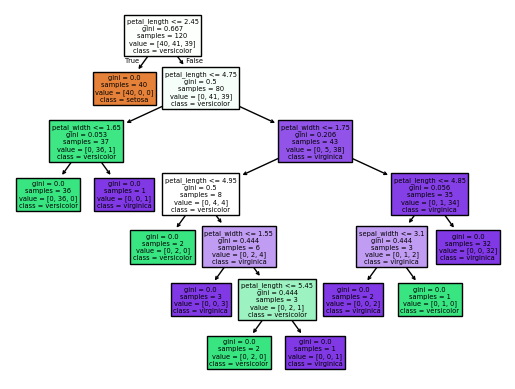

In [7]:
plot_tree(model,feature_names=X.columns,class_names=model.classes_,filled=True)
plt.show()

# When gini = 0.0, it means the bucket is Pure.
### values=[40, 0, 0] means: "I have 40 Setosa, 0 Versicolor, and 0 Virginica."
### Since there is no mix, the computer stops asking questions for that branch. It is 100% sure.
### Now, we need to learn a "Pro Skill".
### By default, the Decision Tree keeps asking questions until gini = 0.0 everywhere. If the data is messy, the tree can become huge and complicated. This is called Overfitting (memorizing).

## Part (c)
### Controlling the Tree (max_depth)

In [8]:
# max_depth=2 means "You can only ask 2 questions max"
small_model=DecisionTreeClassifier(max_depth=2,random_state=42)
small_model.fit(X_train,y_train)
pred=small_model.predict(X_test)
small_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

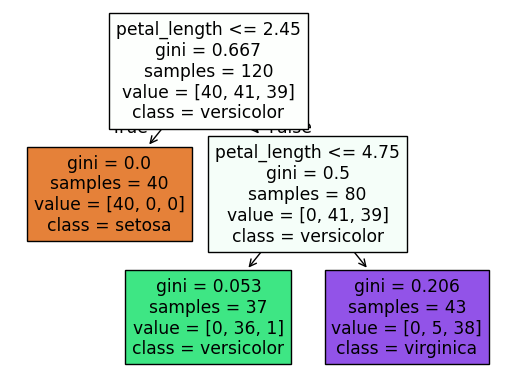

In [9]:
plot_tree(small_model,feature_names=X_test.columns,class_names=small_model.classes_,filled=True)
plt.show()

In [10]:
small_model.score(X_test,y_test)

0.9666666666666667

In [11]:
compare={
    "Model 1":accuracy_score(y_test,prediction),
    "Model 2":accuracy_score(y_test,pred)
}
compare

{'Model 1': 1.0, 'Model 2': 0.9666666666666667}

### Analysis of your result:
### Model 1 (Full Tree): 1.0 (100% Accuracy). It memorized everything.
### Model 2 (Small Tree): 0.96 (96.7% Accuracy).
### The Difference: 0.966 means it got 29 out of 30 correct. It made exactly 1 mistake.
### Why is the "worse" model sometimes better?
### In the real world, Model 1 might be "Overconfident" (Overfitting). Model 2 is simpler and handles "general" rules better, even if it missed one specific tricky flower in the test.